In [1]:
import pandas as pd
%matplotlib inline

In [2]:
path = r"C:\Users\anees\Documents\CS\MP\datasets\top10toxic.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,subreddit,user,comment,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,funny,twowordsdefault,I pretend I can manage and organize an entire ...,5737.0,0.085211,0.006877,0.034166,0.003244,0.031389,0.008157
1,funny,Mitoni,I finally understand why the Civ games are so ...,2100.0,0.046481,0.005644,0.020174,0.003074,0.023335,0.007403
2,funny,B0Boman,It appeals to the male fantasy. Also the femal...,852.0,0.077050,0.006803,0.035094,0.002840,0.028378,0.009588
3,funny,Scottyjscizzle,"Men only want one thing, and it's disgusting! ...",976.0,0.106791,0.004696,0.031197,0.002826,0.028595,0.008310
4,funny,girlsgoneoscarwilde,Science Victory or nothing. We’re either gett...,533.0,0.085482,0.007242,0.041105,0.003002,0.030276,0.007264


In [6]:
subs = df.subreddit.unique()
percents = []
for sub in subs:
    comments = df[df.subreddit==sub]
    users = comments.user
    unq = users.unique()
    dups = comments.duplicated(subset=['user'], keep=False)
    mul_users = comments[dups]
    print(sub, len(mul_users['user'].unique()), mul_users.shape[0])
    toxic = mul_users[(mul_users['toxic']>0.5) | (mul_users['severe_toxic']>0.5)\
                  | (mul_users['obscene']>0.5) | (mul_users['threat']>0.5) \
                  | (mul_users['insult']>0.5) | (mul_users['identity_hate']>0.5)]
    print(toxic.shape[0], len(toxic.user.unique()))
    print(0.2*len(toxic.user.unique()))
    most_toxic_users = toxic.user.value_counts()
    print(most_toxic_users[0:int(0.2*len(toxic.user.unique()))].sum())
    print(most_toxic_users[0:int(0.2*len(toxic.user.unique()))].sum()*100/toxic.shape[0])
    percents.append(most_toxic_users[0:int(0.2*len(toxic.user.unique()))].sum()*100/toxic.shape[0])

funny 6703 19224
1018 891
178.20000000000002
305
29.960707269155208
AskReddit 4407 10804
476 438
87.60000000000001
125
26.26050420168067
todayilearned 7636 22661
1072 941
188.20000000000002
319
29.757462686567163
worldnews 7780 24002
1402 1182
236.4
456
32.52496433666191
science 5578 18682
86 83
16.6
19
22.093023255813954
pics 5997 16400
785 688
137.6
234
29.808917197452228
gaming 6281 17123
747 671
134.20000000000002
210
28.11244979919679
IAmA 4414 18319
328 265
53.0
116
35.36585365853659
videos 6795 18620
1298 1135
227.0
390
30.046224961479197
movies 7547 22466
1161 1003
200.60000000000002
358
30.83548664944014
aww 6473 18577
587 519
103.80000000000001
171
29.131175468483818
Music 5897 19041
964 791
158.20000000000002
331
34.33609958506224


In [7]:
percents

[29.960707269155208,
 26.26050420168067,
 29.757462686567163,
 32.52496433666191,
 22.093023255813954,
 29.808917197452228,
 28.11244979919679,
 35.36585365853659,
 30.046224961479197,
 30.83548664944014,
 29.131175468483818,
 34.33609958506224]

20% of the users are resposible for around 25-35% of the toxcity

In [8]:
import matplotlib.pyplot as plt
import numpy as np

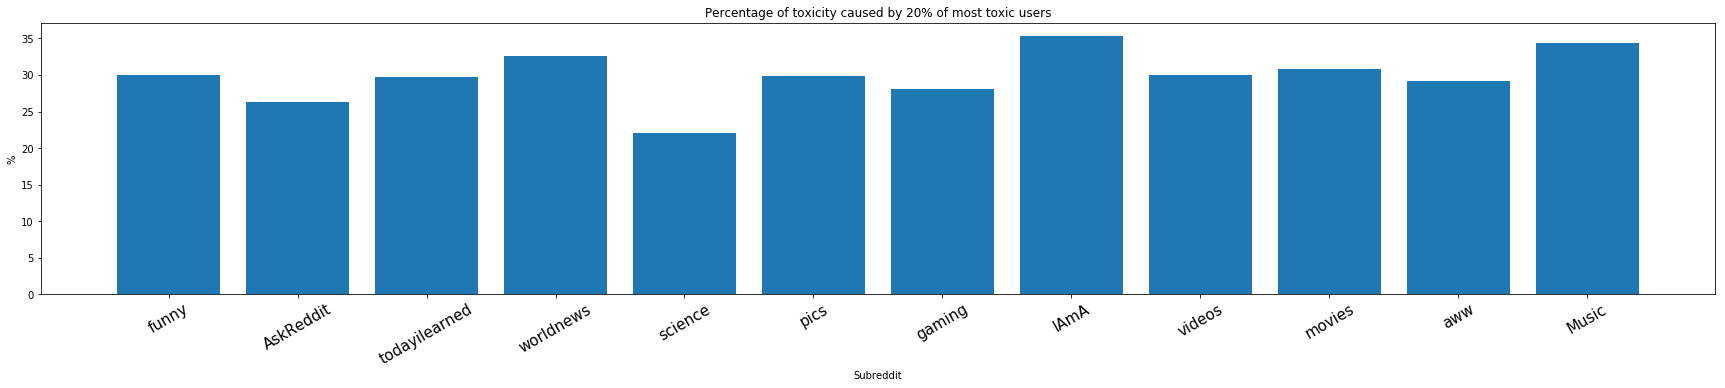

In [9]:
f, ax = plt.subplots(figsize=(30,5)) 
index = np.arange(len(subs))
plt.bar(index, percents)
plt.xlabel('Subreddit', fontsize=10)
plt.ylabel('%', fontsize=10)
plt.xticks(index, subs, fontsize=15, rotation=30)
plt.title("Percentage of toxicity caused by 20% of most toxic users")
plt.show()